<a href="https://colab.research.google.com/github/krishnaD2003/Deep-learning-/blob/main/Basic_deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

In [ ]:
!pip install tensorflow

In [ ]:
import numpy as pd

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
import tensorflow as tf


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
df= pd.read_csv("/content/bank.csv")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [ ]:
df.drop("duration",axis=1,inplace=True)

In [ ]:
df["deposit"].value_counts()

,count
deposit,
no,5873
yes,5289


In [ ]:
df["deposit"]=df["deposit"].map({"yes":1,"no":0})

In [ ]:
x = df.drop('deposit',axis=1)
y= df["deposit"]

In [ ]:
categorical_cols = x.select_dtypes(include=["object"]).columns
categorical_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

In [ ]:
x = pd.get_dummies(x, columns=categorical_cols,drop_first=True)

In [ ]:
x

,age,balance,day,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,59,2343,5,1,-1,0,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True
1,56,45,5,1,-1,0,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True
2,41,1270,5,1,-1,0,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True
3,55,2476,5,1,-1,0,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True
4,54,184,5,2,-1,0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,20,1,-1,0,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
11158,39,733,16,4,-1,0,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True
11159,32,29,19,2,-1,0,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
11160,43,0,8,2,172,5,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False


In [ ]:
scaler = StandardScaler()
x_scaled = scaler .fit_transform(x)


In [ ]:
x_train, x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=5)

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(32,activation='relu', input_dim= x_train.shape[1]))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss ="binary_crossentropy",optimizer='SGD',metrics=['accuracy'])

In [ ]:
history = model.fit(x_train,y_train,validation_split=0.1,epochs=150,batch_size=32,verbose=1)

Epoch 1/150
252/252 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.5450 - loss: 0.7112 - val_accuracy: 0.6282 - val_loss: 0.6515
Epoch 2/150
252/252 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6407 - loss: 0.6392 - val_accuracy: 0.6495 - val_loss: 0.6333
Epoch 3/150
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6582 - loss: 0.6144 - val_accuracy: 0.6551 - val_loss: 0.6224
Epoch 4/150
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6644 - loss: 0.6036 - val_accuracy: 0.6652 - val_loss: 0.6151
Epoch 5/150
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6842 - loss: 0.5931 - val_accuracy: 0.6607 - val_loss: 0.6140
Epoch 6/150
252/252 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6782 - loss: 0.5968 - val_accuracy: 0.6865 - val_loss: 0.6057
Epoch 7/150
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6984 - loss: 0.5828 - val_accuracy: 0.6853 - val_loss: 0.6042
Epoch 8/150
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6987 - loss: 0.5787 - val_acc

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


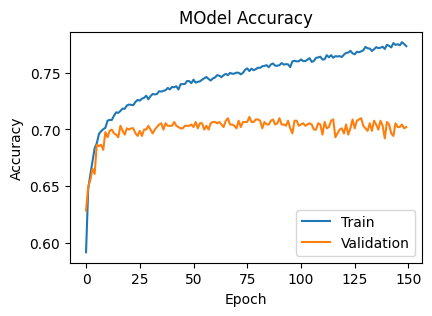

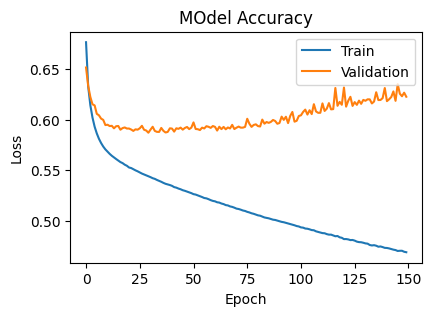

In [ ]:

plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('MOdel Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Validation'])
plt.figure(figsize=(10,3))
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('MOdel Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Validation'],loc = 'upper right')
plt.show()